In [118]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [119]:
df = pd.read_csv("archive.zip", compression = "zip")

pd.set_option("display.max_columns", 100)

In [120]:
df.shape

(50000, 11)

In [121]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [123]:
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [124]:
df["Sales_Classification"].value_counts(normalize = True) * 100

Sales_Classification
Low     69.508
High    30.492
Name: proportion, dtype: float64

In [125]:
x = df.drop(columns = ["Sales_Classification"])
y = df["Sales_Classification"]

In [126]:
y = y.map({"High": 1, "Low": 0})

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify = y, random_state = 36, test_size = 0.20)
all_eda = pd.concat([x_train,y_train], axis = 1)

Now EDA only on x_train

In [128]:
x_train.shape

(40000, 10)

In [129]:
x_train.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
5198,5 Series,2024,North America,Grey,Diesel,Manual,2.8,79543,55602,4203
4787,i8,2024,South America,Red,Electric,Manual,2.4,14322,115221,808
36648,i3,2011,North America,White,Electric,Automatic,1.7,133828,35385,5626
871,7 Series,2021,Europe,Red,Electric,Automatic,2.3,157562,70841,6858
24309,X3,2013,Africa,Black,Petrol,Automatic,2.5,63867,56289,6536


In [130]:
y_train.value_counts(normalize = True)*100

Sales_Classification
0    69.5075
1    30.4925
Name: proportion, dtype: float64

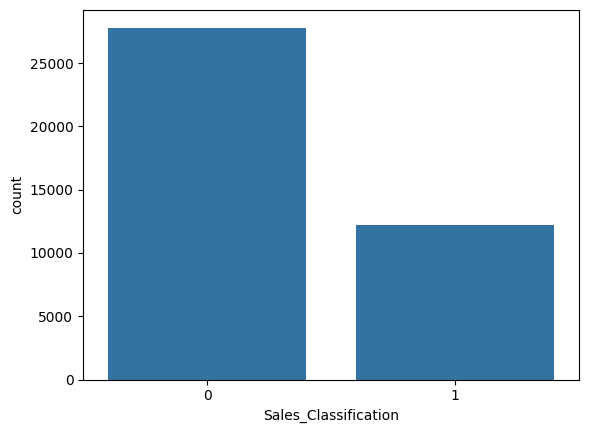

In [131]:
sns.countplot(x = y_train)
plt.show()

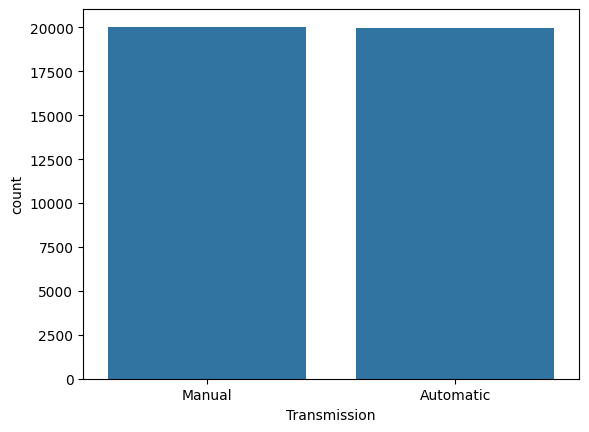

In [132]:
sns.countplot(x = "Transmission", data = x_train)
plt.show()

In [133]:
all_eda.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
5198,5 Series,2024,North America,Grey,Diesel,Manual,2.8,79543,55602,4203,0
4787,i8,2024,South America,Red,Electric,Manual,2.4,14322,115221,808,0
36648,i3,2011,North America,White,Electric,Automatic,1.7,133828,35385,5626,0
871,7 Series,2021,Europe,Red,Electric,Automatic,2.3,157562,70841,6858,0
24309,X3,2013,Africa,Black,Petrol,Automatic,2.5,63867,56289,6536,0


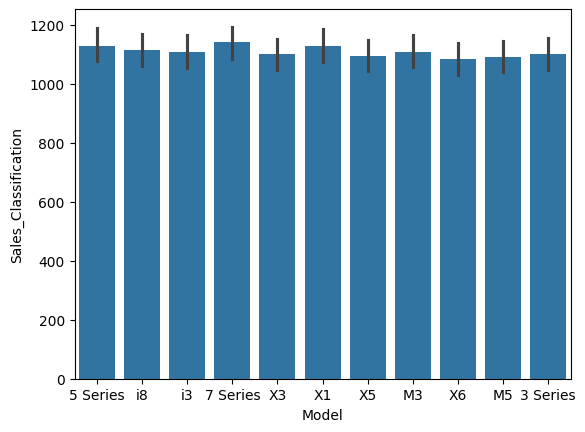

In [134]:
sns.barplot(x = "Model", y = "Sales_Classification", data = all_eda, estimator = np.sum)
plt.show()

In [135]:
corr_eda = all_eda.corr(numeric_only = True)

In [136]:
corr_eda

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
Year,1.000000,-0.000532,0.009952,0.002485,0.007605,0.010658
Engine_Size_L,-0.000532,1.000000,-0.000939,0.001191,-0.000176,0.001590
Mileage_KM,0.009952,-0.000939,1.000000,-0.002850,0.001429,0.008753
Price_USD,0.002485,0.001191,-0.002850,1.000000,0.001243,-0.001074
Sales_Volume,0.007605,-0.000176,0.001429,0.001243,1.000000,0.795505
Sales_Classification,0.010658,0.001590,0.008753,-0.001074,0.795505,1.000000


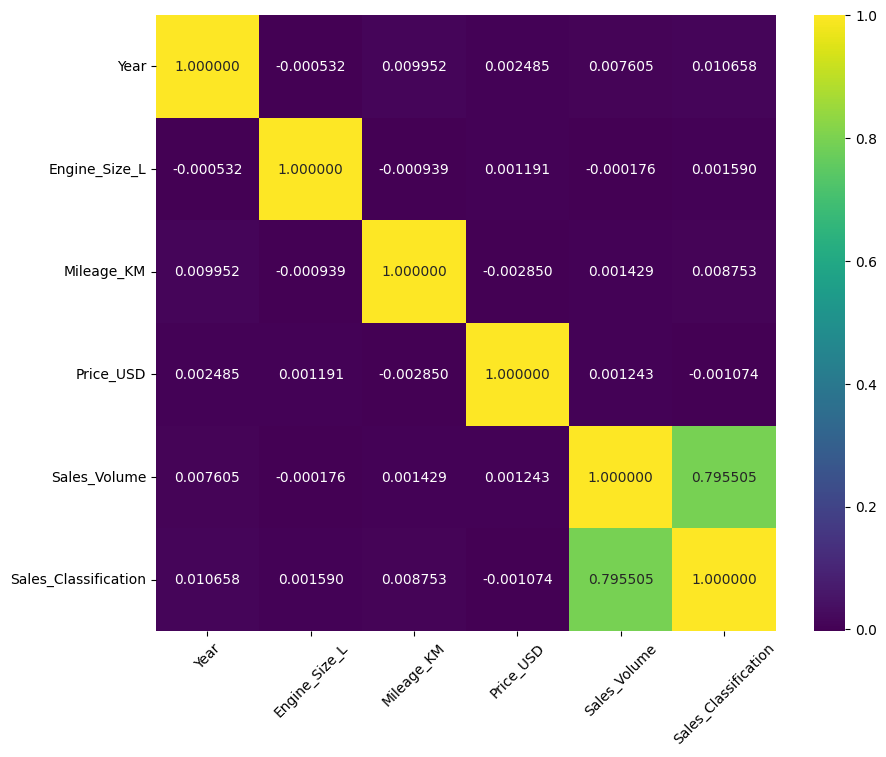

In [137]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_eda, cmap = "viridis", fmt = "f", annot = True)
plt.xticks(rotation = 45)
plt.show()

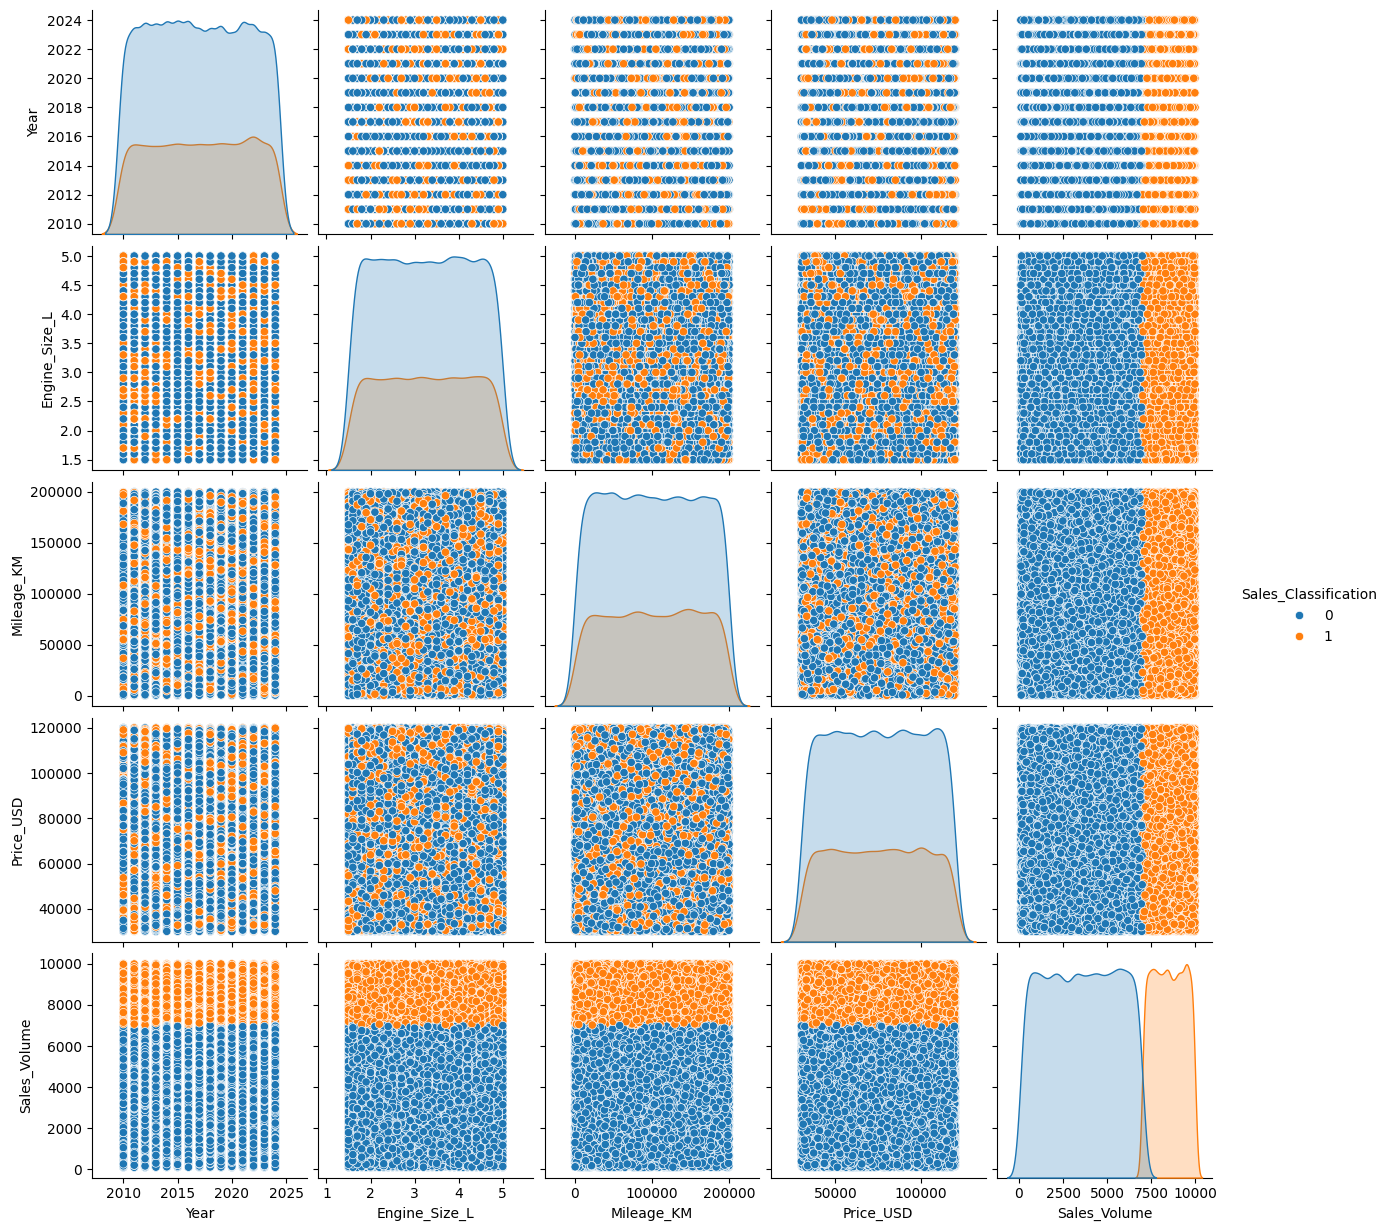

In [138]:
sns.pairplot(all_eda, hue = "Sales_Classification")
plt.show()

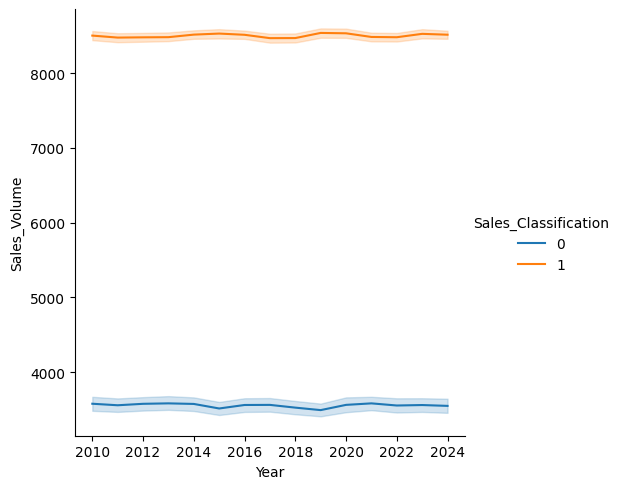

In [139]:
sns.relplot(data = all_eda, x ="Year", y = "Sales_Volume", kind = "line", hue = "Sales_Classification")
plt.show()

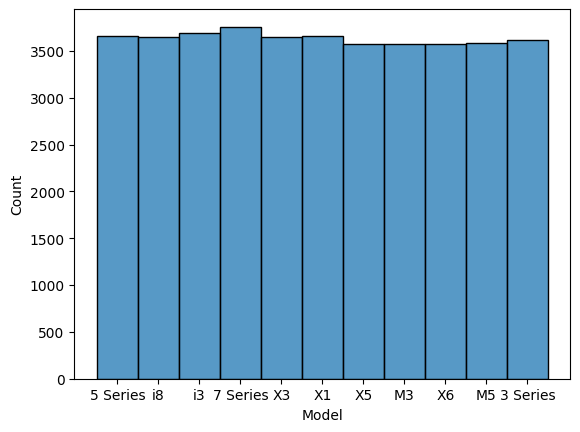

In [140]:
sns.histplot(x = "Model", data = all_eda)
plt.show()

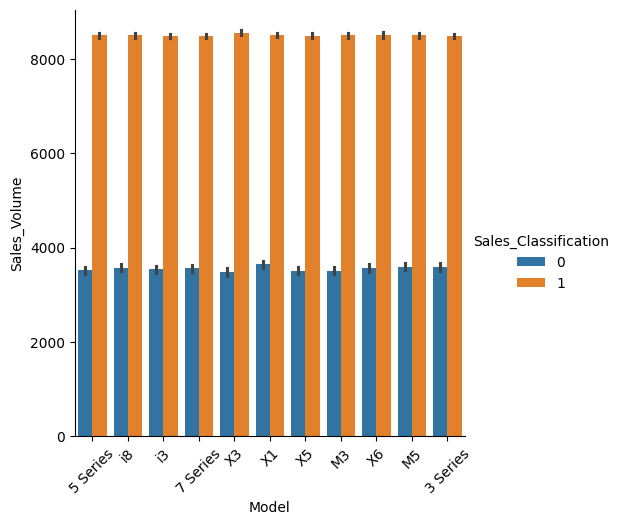

In [141]:
sns.catplot(x = "Model", y = "Sales_Volume", hue = "Sales_Classification", data = all_eda, kind = "bar", estimator = np.mean)
plt.xticks(rotation = 45)
plt.show()

In [142]:
x_train.dtypes

Model             object
Year               int64
Region            object
Color             object
Fuel_Type         object
Transmission      object
Engine_Size_L    float64
Mileage_KM         int64
Price_USD          int64
Sales_Volume       int64
dtype: object

In [143]:
obj_columns = x_train.select_dtypes(include = "object").columns

encoder = OneHotEncoder(sparse_output = False)
encoded = encoder.fit_transform(x_train[obj_columns])
encoded = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(obj_columns), index = x_train.index)

x_train = x_train.drop(columns = obj_columns)

x_train = pd.concat([x_train,encoded], axis = 1)

print(x_train.shape)

(40000, 34)


In [144]:
x_train.head()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,Model_i8,Region_Africa,Region_Asia,Region_Europe,Region_Middle East,Region_North America,Region_South America,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
5198,2024,2.8,79543,55602,4203,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4787,2024,2.4,14322,115221,808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
36648,2011,1.7,133828,35385,5626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
871,2021,2.3,157562,70841,6858,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24309,2013,2.5,63867,56289,6536,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [145]:
#for x_test

encoded_test = encoder.transform(x_test[obj_columns])
encoded_test = pd.DataFrame(encoded_test,columns = encoder.get_feature_names_out(obj_columns))
encoded_test.index = x_test.index

x_test = x_test.drop(columns = obj_columns)
x_test = pd.concat([x_test, encoded_test], axis = 1)

print(x_test.shape)

(10000, 34)


In [146]:
x_test.head()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,Model_i8,Region_Africa,Region_Asia,Region_Europe,Region_Middle East,Region_North America,Region_South America,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
2157,2017,2.9,174562,74647,3236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34484,2018,4.1,35975,60252,8392,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15985,2016,3.6,3894,94724,5001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
36074,2010,1.6,84993,39080,1827,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
16858,2012,2.0,125506,102143,6088,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [147]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Logistic Regression Train Accuracy Score is  0.999
Logistic Regression Accuracy Scoare is  0.9979
Confusion Matrix:
[[6939   12]
 [   9 3040]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6951
           1       1.00      1.00      1.00      3049

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000





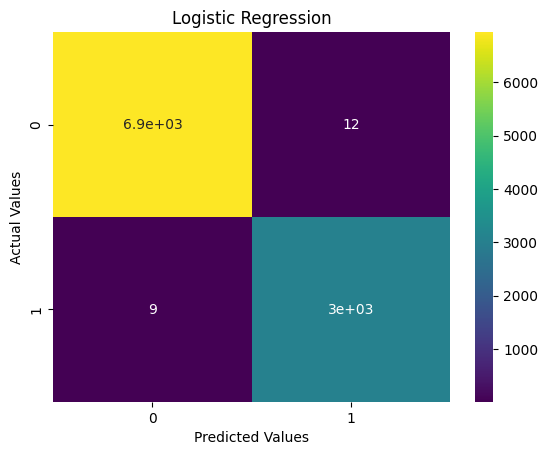

In [148]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

model1_ypred = model1.predict(x_test)

model1_train_accuracyscore = model1.score(x_train,y_train)
model1_accuracyscore = model1.score(x_test,y_test)
model1_confusionmatrix = confusion_matrix(y_test,model1_ypred)

print("Logistic Regression Train Accuracy Score is ", model1_train_accuracyscore)
print("Logistic Regression Accuracy Scoare is ", model1_accuracyscore)
print("Confusion Matrix:")
print(model1_confusionmatrix)
print("\n")
print("Classification Report:")
print(classification_report(y_test,model1_ypred))
print("\n")

sns.heatmap(model1_confusionmatrix, annot = True, cmap = "viridis")
plt.title("Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Decision Tree Train Accuracy Score is  1.0
Decision Tree Accuracy Score is  1.0
Confusion Matrix:
[[6951    0]
 [   0 3049]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6951
           1       1.00      1.00      1.00      3049

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000





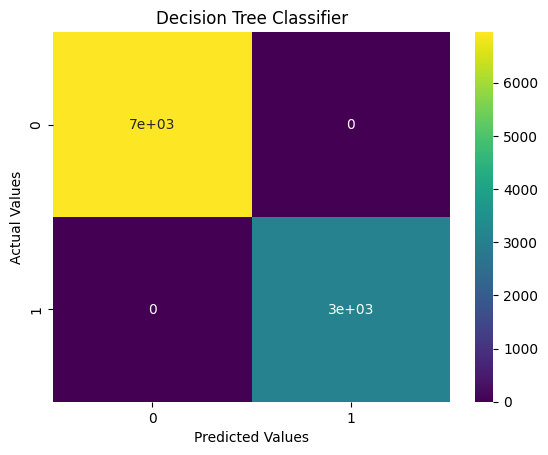

In [149]:
model3 = DecisionTreeClassifier(max_depth = 15, random_state = 36, class_weight = "balanced")
model3.fit(x_train,y_train)

model3_ypred = model3.predict(x_test)

model3_train_accuracyscore = model3.score(x_train,y_train)
model3_accuracyscore = model3.score(x_test,y_test)
model3_confusionmatrix = confusion_matrix(y_test,model3_ypred)

print("Decision Tree Train Accuracy Score is ", model3_train_accuracyscore)
print("Decision Tree Accuracy Score is ", model3_accuracyscore)
print("Confusion Matrix:")
print(model3_confusionmatrix)
print("\n")
print("Classification Report:")
print(classification_report(y_test,model3_ypred))
print("\n")

sns.heatmap(model3_confusionmatrix, annot = True, cmap = "viridis")
plt.title("Decision Tree Classifier")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Random Forest Classifier Train Accuracy Score is  1.0
Random Forest Classifier Accuracy Score is  1.0
Confusion Matrix:
[[6951    0]
 [   0 3049]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6951
           1       1.00      1.00      1.00      3049

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000





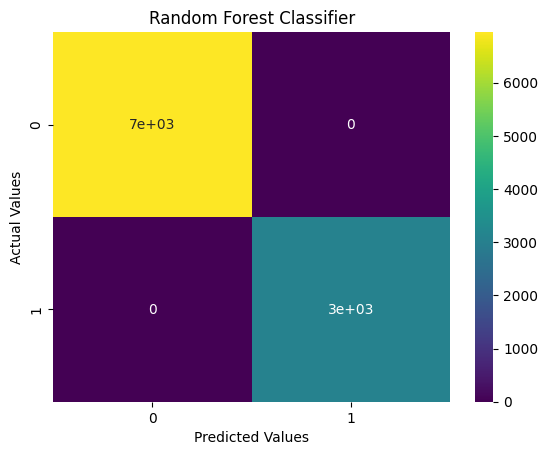

In [150]:
model4 = RandomForestClassifier(max_depth = 200, random_state = 36, criterion = "entropy", n_estimators = 200, min_samples_split = 50, class_weight = "balanced")
model4.fit(x_train,y_train)

model4_ypred = model4.predict(x_test)

model4_train_accuracyscore = model4.score(x_train,y_train)
model4_accuracyscore = model4.score(x_test,y_test)
model4_confusionmatrix = confusion_matrix(y_test,model4_ypred)

print("Random Forest Classifier Train Accuracy Score is ", model4_train_accuracyscore)
print("Random Forest Classifier Accuracy Score is ", model4_accuracyscore)
print("Confusion Matrix:")
print(model4_confusionmatrix)
print("\n")
print("Classification Report:")
print(classification_report(y_test,model4_ypred))
print("\n")
sns.heatmap(model4_confusionmatrix, annot = True, cmap = "viridis")
plt.title("Random Forest Classifier")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

XGB Classifier Train Accuracy Score is  0.99995
XGB Classifier Accuracy Score is  0.9998
Confusion Matrix:
[[6949    2]
 [   0 3049]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6951
           1       1.00      1.00      1.00      3049

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000





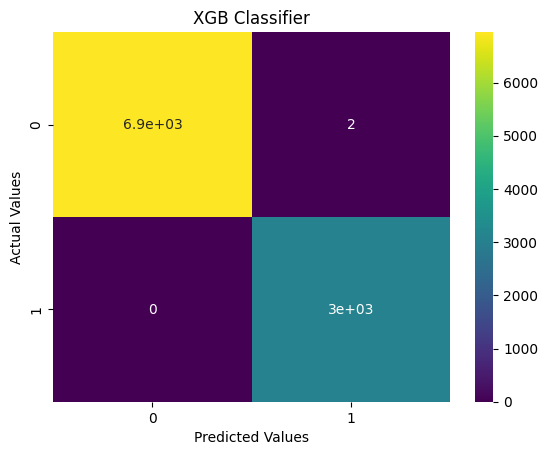

In [151]:
model5 = XGBClassifier(max_depth = 9, random_state = 36, objective = "binary:logistic", n_estimators = 100, learning_rate = 0.10)
model5.fit(x_train,y_train)

model5_ypred = model5.predict(x_test)

model5_train_accuracyscore = model5.score(x_train,y_train)
model5_accuracyscore = model5.score(x_test,y_test)
model5_confusionmatrix = confusion_matrix(y_test,model5_ypred)

print("XGB Classifier Train Accuracy Score is ", model5_train_accuracyscore)
print("XGB Classifier Accuracy Score is ", model5_accuracyscore)
print("Confusion Matrix:")
print(model5_confusionmatrix)
print("\n")
print("Classification Report:")
print(classification_report(y_test,model5_ypred))
print("\n")
sns.heatmap(model5_confusionmatrix, annot = True, cmap = "viridis")
plt.title("XGB Classifier")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Gaussian NB Train Accuracy Score is  0.996125
Gaussian NB Accuracy Score is  0.9957
Confusion Matrix:
[[6934   17]
 [  26 3023]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6951
           1       0.99      0.99      0.99      3049

    accuracy                           1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000





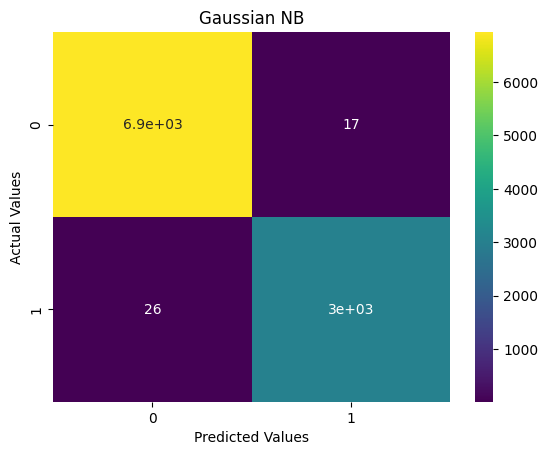

In [152]:
model6 = GaussianNB()
model6.fit(x_train,y_train)

model6_ypred = model6.predict(x_test)

model6_train_accuracyscore = model6.score(x_train,y_train)
model6_accuracyscore = model6.score(x_test,y_test)
model6_confusionmatrix = confusion_matrix(y_test,model6_ypred)

print("Gaussian NB Train Accuracy Score is ", model6_train_accuracyscore)
print("Gaussian NB Accuracy Score is ", model6_accuracyscore)
print("Confusion Matrix:")
print(model6_confusionmatrix)
print("\n")
print("Classification Report:")
print(classification_report(y_test,model6_ypred))
print("\n")
sns.heatmap(model6_confusionmatrix, annot = True, cmap = "viridis")
plt.title("Gaussian NB")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Decision Tree and Random Forest is showing accuracy 1. So Random Forest is choosing for final model

In [153]:
x.shape

(50000, 10)

In [154]:
x.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080


In [155]:
final_encoder = OneHotEncoder(sparse_output = False)
final_encoded = final_encoder.fit_transform(x[obj_columns])
final_encoded = pd.DataFrame(final_encoded, columns = final_encoder.get_feature_names_out(obj_columns), index = x.index)

x = x.drop(columns = obj_columns)
x = pd.concat([x,final_encoded], axis = 1)

In [156]:
x.shape

(50000, 34)

In [157]:
x.head()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,Model_i8,Region_Africa,Region_Asia,Region_Europe,Region_Middle East,Region_North America,Region_South America,Color_Black,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2016,3.5,151748,98740,8300,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2013,1.6,121671,79219,3428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2022,4.5,10991,113265,6994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2024,1.7,27255,60971,4047,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2020,2.1,122131,49898,3080,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [158]:
y.value_counts()

Sales_Classification
0    34754
1    15246
Name: count, dtype: int64

In [159]:
final_scaler = StandardScaler()
x = final_scaler.fit_transform(x)

In [160]:
final_model = RandomForestClassifier(max_depth = 200, random_state = 36, criterion = "entropy", n_estimators = 200, min_samples_split = 50, class_weight = "balanced")
final_model.fit(x,y)

,n_estimators,200
,criterion,'entropy'
,max_depth,200
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [161]:
with open("final_encoder.pkl", "wb") as file:
    pickle.dump(final_encoder, file)

with open("final_scaler.pkl", "wb") as file:
    pickle.dump(final_scaler, file)

with open("final_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

